Íñigo Martín Melero

Práctica Opcional 2b: Crypto - markets y Animal Shelter.

Para este apartado B de la práctica, pasamos a emplear 2 BBDD diferentes: una referente a criptomercados y otra referente a refugios de animales.

0. Carga de Datos en DataFrame

In [4]:
#Importamos pandas, matplotlib y seaborn, y leemos con read_csv para cargar directamente un DataFrame.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "notebook+pdf"

cryptoDF=pd.read_csv('C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional2/crypto-markets.csv')
print(cryptoDF)

animalDF=pd.read_csv('C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional2/aac_shelter_outcomes.csv', parse_dates=['datetime'])
print(animalDF)

               slug symbol         name        date  ranknow        open  \
0           bitcoin    BTC      Bitcoin  2013-04-28        1  135.300000   
1           bitcoin    BTC      Bitcoin  2013-04-29        1  134.440000   
2           bitcoin    BTC      Bitcoin  2013-04-30        1  144.000000   
3           bitcoin    BTC      Bitcoin  2013-05-01        1  139.000000   
4           bitcoin    BTC      Bitcoin  2013-05-02        1  116.380000   
...             ...    ...          ...         ...      ...         ...   
748358  monero-gold   XMRG  Monero Gold  2018-03-06     1587    0.000230   
748359  monero-gold   XMRG  Monero Gold  2018-03-07     1587    0.000322   
748360  monero-gold   XMRG  Monero Gold  2018-03-08     1587    0.000198   
748361  monero-gold   XMRG  Monero Gold  2018-03-09     1587    0.000186   
748362  monero-gold   XMRG  Monero Gold  2018-03-10     1587    0.000185   

              high         low       close  volume        market  close_ratio  \
0     

1. Gráfico del número de adopciones

<AxesSubplot:>

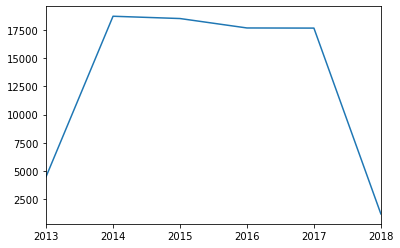

In [11]:
#Hacemos los diagramas temporales, haciendo un resample del año

animalDF['datetime'].value_counts().resample('Y').sum().plot.line()

<AxesSubplot:>

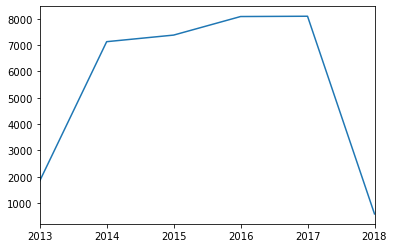

In [12]:
#Hacemos los diagramas temporales, haciendo un resample del año y filtrando Adoption

animalDF1=animalDF.loc[animalDF['outcome_type'].isin(['Adoption'])]
animalDF1['datetime'].value_counts().resample('Y').sum().plot.line()

<AxesSubplot:>

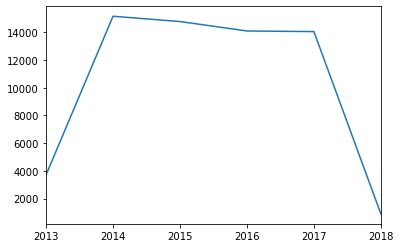

In [13]:
#Hacemos los diagramas temporales, haciendo un resample del año y filtrando Adoption, Euthanasia y Transfer

animalDF2=animalDF.loc[animalDF['outcome_type'].isin(['Adoption','Euthanasia', 'Transfer'])]
animalDF2['datetime'].value_counts().resample('Y').sum().plot.line()

En primer lugar, debo comentar las dificultades halladas al realizar este gráfico. 
Representando todos los valores contenidos en el DataFrame, se obtienen unos valores más elevados a los del enunciado (gráfico mío:5000 registros,2013 vs enunciado:4000 registros,2013).
Filtrando solo en los valores con outcome_type = Adoption, obtengo gráfico mío:2000 registros,2013 vs enunciado:4000 registros,2013.
Por ello, he tenido que filtrar unas cuantas combinaciones para que se pareciese lo máximo posible mi gráfico al del enunciado. Así, filtrando por Adoption, Euthanasia y Transfer, obtengo uno muy similar al del enunciado. 
En cualquier caso, el eje X representa la agrupación por años del refugio de animales, y el eje Y representa la cantidad de registros (en el primer gráfico hablamos de registros totales, en el segundo hablamos de adopciones y en el tercero tratamos adopciones + eutanasias + transferencias).
Se puede concluir que el número de animales adoptados en el refugio tuvo un máximo en el periodo 2014 - 2017, y en 2018 ha descendido drásticamente. No solo ha bajado el número de animales adoptados, sino en general el número de animales totales (registros, en general) que maneja el refugio. 

2. Correlación compraventa criptodivisas un día y el siguiente

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

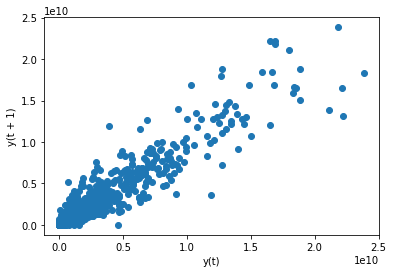

In [14]:
#Para comparar un día y el siguiente, usamos un lag plot
from pandas.plotting import lag_plot

lag_plot(cryptoDF['volume'])

El eje X representa el número de criptodivisas compradas en un día en concreto, y el eje Y representa el número de criptodivisas compradas al día siguiente.
La tendencia se aproxima a una línea diagonal, por lo que se puede inferir que las criptodivisas compradas un día y el siguiente están correlacionadas. 

3. Correlación compraventa criptodivisas un día y el siguiente, para los últimos 250 días

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

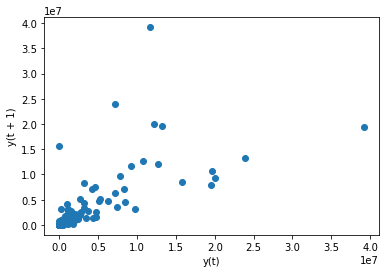

In [15]:
#Para comparar x días, introducimos el tail usando un lag plot

lag_plot(cryptoDF['volume'].tail(250))

El eje X representa el número de criptodivisas compradas en un día en concreto, y el eje Y representa el número de criptodivisas compradas al día siguiente.
En este caso, tenemos los datos de 250 días, pero la tendencia sigue aproximándose a una línea diagonal, aunque de forma más débil. 

4. Autocorrección para la serie completa

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

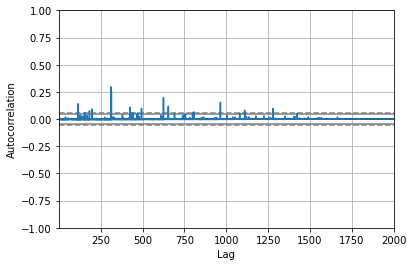

In [19]:
#Finalizamos con un gráfico de autocorrelación
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(cryptoDF['volume'].sample(2000))

En el eje X queda representado el retardo (o lag), mientras que en el eje Y está representado el índice de autocorrelación.
Este gráfico nos muestra que existen algunos picos de autocorrelación, pero no son significativos (todos menores al 0.5). En la mayoría de ocasiones, el índice de autocorrelación está en 0, por lo que se puede deducir que las variables son independientes y no existe correlación, cuando se intenta representar todas las periodicidades a la vez (en nuestro caso 2000, porque el ordenador no da para más). 